<h1>Background and Assumptions</h1>

<h2>The Seto Model</h2><br/>

Assumption: At the grain boundaries (GB) a population of filled and charged strap states exist within the band gap. This causes the conduction band to bend upwards at each GB forming a barrier to charge transport.

<h3>Expression for iter-grain mobility $\mu_{ig}$</h3>


\begin{equation}
\mu_{ig} = \mu_0\exp\left(-\frac{\Phi_B}{k_BT}\right)
\end{equation}

where,

$$\Phi_B = \frac{e^2n_t^2}{8\varepsilon_{\infty}\varepsilon_0n_e}$$
    - $\Phi_B$ is the barrier  height at the GB
    - $n_t$ is the trap density - units cm$^{-2}$
$$\mu_0 = \frac{L}{\sqrt{2\pi m_ek_BT}}$$
    - $\mu_0$ is intra-grain mobility
    - $L$ is grain size
    
<h3>Expression for effective mobility $\mu_{eff}$</h3><br/>
In a real film the mobility will be limited by ionized impurity scattering. We'll assume that the level of scattering is independent of carrier concentration for the time being (it isn't!) and define a constant upper limit to the mobility, $\mu_{ii}$. We combine $\mu_{ig}$ and $\mu_{ii}$ according to:

$$\frac{1}{\mu_{eff}} = \frac{1}{\mu_{ig}} + \frac{1}{\mu_{ii}}$$

<h2>The Extended Seto Model</h2>
    




In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#get the data
import csv
f = open('cheat.csv', 'rb') #open file for reading
reader = csv.reader(f)
headers = reader.next() #get file headers

#read data to list
data = []
for line in reader:
    data.append(line)
    
#transpose data into columns
data = [[float(y) for y in x] for x in transpose(data)]

x = data[0]
n = data[1]
mu = data[2]


In [6]:
#define constants to be used

e = 1.602e-19 #electronic charge
permInf = 8.3 #permittivity for single crystal ZnO
permZero = 8.85e-12 #permittivity of free space
me = 0.35 #effective mass
mzero = 9.11e-31 #electron mass
kB = 1.38e-23 #Boltzmann
T = 300 #Kelvin
hbar = 1.055e-34

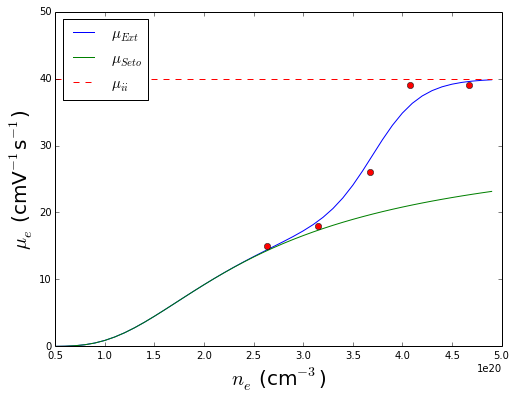

In [7]:
from ipywidgets import *


def phiB(n, nt = 1.0e14):
    '''Barrier Height'''
    value = (e*nt)**2/(8*permInf*permZero*n) 
    return value

def muZero(L = 5):
    '''intra-grain mobility'''
    value = L*1e-9/sqrt(2*pi*me*kB*T) #L converted to cm here using factor 1e-7
    return value

def muig(n, nt=1, L=5):
    '''iter-grain mobility'''
    units=1e14 #cm^-3
    value = muZero(L)*exp(-(phiB(n, nt*units))/(kB*T))
    return value

def museto(muii, nt, L):
    '''Effective Mobility
       Limited by ionized impurity scattering
       Constant value of muii used as approximation'''
    value = ((1/muig(ne, nt, L)) + 1/muii)**-1
    return value

def setoPlot(muii, nt, L):
    plot(ne, museto(muii, nt, L), label='$\mu_{eff}$')
    plot(ne, [muii]*len(ne), '--', label='$\mu_{ii}$')
    #plot(ne, [muZero(L)]*len(ne), label='$\mu_0$')
    plot(ne, muig(ne, nt, L), '--', label='$\mu_{ig}$')
    plot(array(n), mu, 'o', color='red')
    xlabel(headers[1])
    ylabel(headers[2])
    legend(loc=2)
    ylim([0,60])
    
def bmShift(ne):
    '''Returns BM-shift in eV'''
    value = hbar**2*(3*pi**2*ne*1e6)**(2.0/3)/(2*me*mzero)
    return value

def mubm(n, nt=1, L=5, RN=1):
    '''iter-grain mobility'''
    units=1e14 #cm^-3
    value = muZero(L)*exp((bmShift(n) +RN*e -2*phiB(n, nt*units))/(kB*T))
    return value

def muext(muii, nt, L, RN):
    '''Effective Mobility for extended Seto model
       Limited by ionized impurity scattering
       Constant value of muii used as approximation'''
    value = ((1/(muig(ne, nt, L)+(mubm(ne, nt, L, RN)))) + 1/muii)**-1
    #value = ((1/(muig(ne, nt, L))) + 1/muii)**-1
    return value

def extSetoPlot(muii, nt, L, RN):
    fig = figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.plot(ne, muext(muii, nt, L, RN), label='$\mu_{Ext}$')
    ax.plot(ne, museto(muii, nt, L), label='$\mu_{Seto}$')
    ax.plot(ne, [muii]*len(ne), '--', label='$\mu_{ii}$')
    
    ax.plot(array(n), mu, 'o', color='red')
    ax.set_xlabel(headers[1], fontsize=20)
    ax.set_ylabel(headers[2], fontsize = 20)
    ax.legend(loc=2, fontsize = 15)
    ax.set_ylim([0,50])
    
    
#define carrier conc. range of interest   
ne = arange(0.5, 5, 0.1)*1e20   

#bind sliders to variables
nt_slider = FloatSlider(min=0.1, max=10, step=0.01, value=2.2)
L_slider = FloatSlider(min=1, max=100, step=0.01, value = 15)
muii_slider = FloatSlider(min=0.001, max=100, step = 1, value = 42)
RN_slider = FloatSlider(min=-1, max=0, step = 0.01, value = -0.5)



#generate interactive plot

interactive(extSetoPlot, nt=nt_slider, L=L_slider, muii=muii_slider, RN=RN_slider)


In [9]:
bmShift(ne)/e

array([ 0.14152071,  0.1598113 ,  0.17710821,  0.19359761,  0.20941205,
        0.22465012,  0.23938767,  0.25368463,  0.26758939,  0.28114175,
        0.29437494,  0.30731704,  0.31999211,  0.3324209 ,  0.34462152,
        0.35660984,  0.36839991,  0.38000424,  0.391434  ,  0.40269925,
        0.41380906,  0.42477168,  0.43559461,  0.44628471,  0.45684827,
        0.46729108,  0.47761848,  0.4878354 ,  0.49794642,  0.50795581,
        0.51786754,  0.52768529,  0.53741255,  0.54705256,  0.55660836,
        0.56608283,  0.57547867,  0.58479841,  0.59404447,  0.60321913,
        0.61232454,  0.62136275,  0.63033569,  0.63924521,  0.64809307])